<a href="https://colab.research.google.com/github/RiseAboveAll/PYTORCH_Learning/blob/master/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sequential Data

- Example of sequential data : Text , Speech, Financial Data

<h1> Types Of Sequence Data : </h1>

1. Time Series Data

  - Any continues value measurement recorded periodically 

2. Text 

  - Can be treated as sequence 

  - In ML we used to create Bag of Words, Using this we used to loose information.

<h1> What is Sequence ? </h1>

Length of data is measured by time , represented by letter 'T'.

Shape of Data = N x T x D

N -> N.O of Samples

T -> Time Step

D -> N.O of Features

Most of the time we have variable length sequences, i.e if T is variable i.e not constant length of sequence in data will differ but we require constant length of all . Example sentences , words in sentences differ. We can pad the sequences with 0s so that all the sequence at T(n) become constant length. 

In pytorch , instead of having all the sequences padded to the same length as the longest sequence, just do this accross single batches. Pytorch try to group sequences on the basis of similarity in length , hence batches will be random but not as random as it would be.  



# Forecasting

- We have time series , we have to predict next values of the time series.

- Number of future steps we want to predict is called Horizon


# RNN

**In ANN we used to calculate the output of hidden node using the input vector and output of output node using the output of hidden node as input . X -> H -> Y_hat.**

**H = a(W.T . X + b)**

**Y_hat = a(W.T . H + b)**

Whereas,

**In RNN, the *Hidden Node*  loop back to itself, i.e in other words the *Hidden Node* does not only depends on the input, but also on it's own previous (time-stamp) value. This *Hidden Node is also called *Hidden State*. This Hidden State is non linear function of past values. This loop-back to previous value states that there is time delay of one step**

<h3> RNN Equation </h3>

Ht = a(Wxh.T . X + Whh.T . Ht-1 + b)

Y_hat = a(W.T . Ht + b)

<h3> Calculation </h3>

Given : x1,x2,x3,....,xt

Shape(Xt) : D

First Step : 

-> h1 = a(Wxh.T . x1 + Whh.T . h0 + b)

-> y_hat1 = a(W.T . h1 + b)

Now we have x2 & h1 :

-> h2 = a(Wxh.T . x2 + Whh.T . h1 + b)

-> y_hat2 = a(W.T . h2 + b)

We can repeat this process till we calculate hT and y_hatT. 

**Each y_hatT depends on x1,x2,x3,...,xt, we get yhat for each corresponding x1,x2,x3,....,xt...xT. xT gives us the final prediction , i.e final y_hat , hence all the previous time-stamps y_hat will be removed. There are instances when we do not discard the previous y_hats , instances like neural machine translation. In machine translation , both input and output are senteces but in different languages. Both the input and output are sequences, capture predctions at each time point. 

<h3>Classification Probability</h3>

- In ANN and CNN after applying softmax the output prediction is probability distribution. P(y=k|X)

- For neural machine translation, it is also a classification, but we will have probability of yt=k given something. P(y=k|?) . 

What is this 'Something'?

![RNN](https://raw.githubusercontent.com/RiseAboveAll/PYTORCH_Learning/master/RNN.PNG)

We can say that y_hatT depends on every X in the input sequence. Hence:

P(y1=k|x1)

P(y2=k|X2,X1)

P(y3=k|X3,X2,X1)

.
.
.
.

P(yT=k|XT,...,X3,X2,X1)

RNN accounts for all the previous words in the sentence not only the previous words. 



# RNN Code Prepration

In pytorch simple RNN layer is called RNN avaliable in nn module of torch : nn.RNN(input_size,hidden_size,num_layers,nonlinearity,batch_first=True)

batch_first=True means the data is of shape : N  x T x D

With RNN there are two inputs and set of weights. It wont only depend on Input X but also on previous time-stampt hidden state.

Hence in forward function we need to first define the initial hidden state.

L -> Number of RNN Layers

N -> Batch Size

M -> Number of hidden features

RNN module in pytorch can be a single layer and also stack of RNN layers. For all hidden states we will have few dimensions (n,l,t,j):

n - which sample

l - which layer

t - which time-step

j - Which feature

RNN gives you two output : 

1. The first output gives us the hidden states for the final layer at each time step (n,t,j) . We only use first output mostly.

2. The second output gives us the hidden states over all of hidden layers but only at the final time step. (n,l,j)

As a last step we pass hidden state to the last dense layer. Since the hidden state we have obtained from the RNN module is N,T,M . This gives us hidden states for every time-steps. But in certain cases we only want hidden state at the final time step .


<h3>Build Model</h3>

```
class SimpleRNN(nn.Module):
  def __init__(self,num_inputs,num_hidden,num_layers,num_outputs):
    super(SimpleRNN,self).__init__()
    self.D=num_inputs
    self.M=num_hidden
    self.K=num_outputs
    self.L=num_layers
    self.rnn=nn.RNN(
      input_size=self.D,
      hidden_size=self.M,
      num_layers=self.L,
      nonlinearity='relu',
      batch_first=True)
    self.fc=nn.Linear(self.M,self.K)
  def forward(self,X):
    # Initial hidden states :  L x N x M

    h0=torch.zeros(self.L,X.size(0),self.M).to(device)
    #Get RNN unit output
    #out is of size (N , T , M)
    out,_=self.rnn(X,h0)
    #We only want hT at the final time-step
    #N x M -> N x K
    out=self.fc(out[:,-1,:])
    return out


```

<h3>Instantiate the Model</h3>

```

model=SimpleRNN(num_inputs=1,num_hidden=5,num_layers=1,num_outputs=1)
model.to(device)

```

<h3>Loss and Optimizer</h3>

```
criterion=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=.1)
```

<h3>Make Inputs and Targets</h3>

```
x_train
y_train
```

<h3>Making Predictions</h3>
input_=x_test[i].reshape(1,T,1)
p=model(input_)[0,0].item()




# Code

In [ ]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt


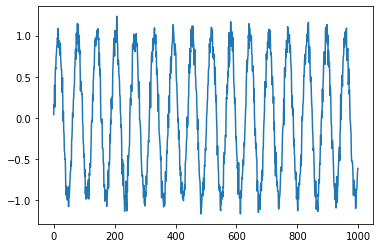

In [ ]:
#Make orignal data
N=1000
series=np.sin(.1*np.arange(N))+np.random.randn(N)*.1
plt.plot(series)

In [ ]:
#build the dataset
#Let see if we can use T past values to predict the next value
T=10
X=[]
Y=[]
for t in range(len(series)-T):
  x=series[t:t+T]
  X.append(x)
  y=series[t+T]
  Y.append(y)
X=np.array(X).reshape(-1,T,1)
Y=np.array(Y).reshape(-1,1)
N=len(X)

In [ ]:
Y.shape

(990, 1)

In [ ]:
#Set Device
device=torch.device("cuda:0"if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
#Define Simple RNN
class SimpleRNN(nn.Module):
  def __init__(self,num_inputs,num_hidden,num_layers,num_outputs):
    super(SimpleRNN,self).__init__()
    self.D=num_inputs
    self.M=num_hidden
    self.K=num_outputs
    self.L=num_layers
    #note : batch_first=True means that data will be of shape (num_samples,sequence_length,num_features) rather than (sequence_lengthnum_samples,num_feaures)
    self.rnn=nn.RNN(
      input_size=self.D,
      hidden_size=self.M,
      num_layers=self.L,
      nonlinearity='relu',
      batch_first=True)
    self.fc=nn.Linear(self.M,self.K)
  def forward(self,X):
    # Initial hidden states :  L x N x M
 
    h0=torch.zeros(self.L,X.size(0),self.M).to(device)
    #Get RNN unit output
    #out is of size (N , T , M)
    out,_=self.rnn(X,h0)
    #We only want hT at the final time-step
    #N x M -> N x K
    out=self.fc(out[:,-1,:])
    return out

In [ ]:
#Instantiate Model
model=SimpleRNN(num_inputs=1,num_hidden=5,num_layers=1,num_outputs=1)
model.to(device)

SimpleRNN(
  (rnn): RNN(1, 5, batch_first=True)
  (fc): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
#Loss & Optimizer
criterion=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=.1)

In [ ]:
#Make inputs and targets
X_train=torch.from_numpy(X[:-N//2].astype(np.float32))
Y_train=torch.from_numpy(Y[:-N//2].astype(np.float32))
X_test=torch.from_numpy(X[-N//2:].astype(np.float32))
Y_test=torch.from_numpy(Y[-N//2:].astype(np.float32))

In [ ]:
X_train,Y_train=X_train.to(device),Y_train.to(device)
X_test,Y_test=X_test.to(device),Y_test.to(device)


In [ ]:
def full_gd(model,criterion,optimizer,X_train,Y_train,X_test,Y_test,epochs=200):
  #stuff to store
  train_losses=np.zeros(epochs)
  test_losses=np.zeros(epochs)

  for it in range(epochs):
    #Zero the parameter gradients
    optimizer.zero_grad()
    #Forward Pass
    outputs=model(X_train)
    loss=criterion(outputs,Y_train)
    #Backward & Optimize
    loss.backward()
    optimizer.step()
    #Save Losses
    train_losses[it]=loss.item()
    #Test Loss
    test_outputs=model(X_test)
    test_loss=criterion(test_outputs,Y_test)
    test_losses[it]=test_loss.item()
    if(it+1)%5==0:
      print(f'Epoch:{it+1}/{epochs}, Train Loss: {loss.item():.4f}, Test loss: {test_loss.item():.4f}')
  return train_losses,test_losses

In [ ]:
train_losses,test_losses=full_gd(model,criterion,optimizer,X_train,Y_train,X_test,Y_test,200)

Epoch:5/200, Train Loss: 0.2839, Test loss: 0.2230
Epoch:10/200, Train Loss: 0.0930, Test loss: 0.0630
Epoch:15/200, Train Loss: 0.0730, Test loss: 0.0808
Epoch:20/200, Train Loss: 0.0621, Test loss: 0.0600
Epoch:25/200, Train Loss: 0.0367, Test loss: 0.0371
Epoch:30/200, Train Loss: 0.0315, Test loss: 0.0335
Epoch:35/200, Train Loss: 0.0279, Test loss: 0.0279
Epoch:40/200, Train Loss: 0.0218, Test loss: 0.0231
Epoch:45/200, Train Loss: 0.0220, Test loss: 0.0243
Epoch:50/200, Train Loss: 0.0214, Test loss: 0.0235
Epoch:55/200, Train Loss: 0.0214, Test loss: 0.0235
Epoch:60/200, Train Loss: 0.0211, Test loss: 0.0232
Epoch:65/200, Train Loss: 0.0210, Test loss: 0.0232
Epoch:70/200, Train Loss: 0.0210, Test loss: 0.0230
Epoch:75/200, Train Loss: 0.0209, Test loss: 0.0231
Epoch:80/200, Train Loss: 0.0209, Test loss: 0.0230
Epoch:85/200, Train Loss: 0.0208, Test loss: 0.0230
Epoch:90/200, Train Loss: 0.0208, Test loss: 0.0230
Epoch:95/200, Train Loss: 0.0208, Test loss: 0.0230
Epoch:100/200

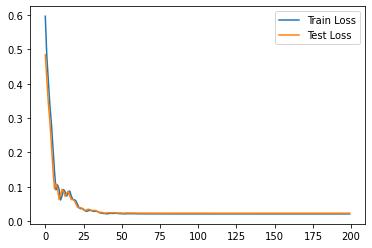

In [ ]:
#Loss Curve
plt.plot(train_losses,label='Train Loss')
plt.plot(test_losses,label='Test Loss')
plt.legend()

In [ ]:
#Forecasting using true targets

validation_target=Y[-N//2:]
validation_prediction=[]
i=0
while len(validation_prediction)<len(validation_target):
  input_=X_test[i].reshape(1,T,1)
  p=model(input_)[0,0].item()
  i+=1
  validation_prediction.append(p)
  


In [ ]:
validation_prediction[:10]

[0.23883990943431854,
 0.31529897451400757,
 0.4141419529914856,
 0.5276208519935608,
 0.6263653039932251,
 0.6915383338928223,
 0.7500914931297302,
 0.8010855317115784,
 0.846693217754364,
 0.8939420580863953]

In [ ]:
validation_target[:10]

array([[0.23237376],
       [0.32831349],
       [0.42097283],
       [0.50942594],
       [0.59278903],
       [0.67022918],
       [0.74097261],
       [0.80431249],
       [0.85961595],
       [0.90633041]])

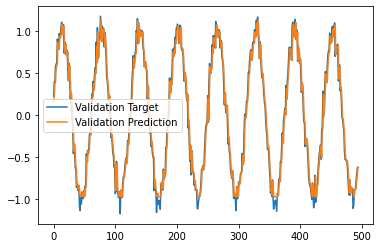

In [ ]:
plt.plot(validation_target,label='Validation Target')
plt.plot(validation_prediction,label='Validation Prediction')
plt.legend()

In [ ]:
#Forecasting Future Values
#Multi Step Forecast
validation_target=Y[-N//2:]
validation_prediction=[]
last_X=X_test[0].view(T)
i=0
while len(validation_prediction)<len(validation_target):
  input_=last_X.reshape(1,T,1)
  p=model(input_)
  validation_prediction.append(p[0,0].item())
  last_X=torch.cat((last_X[1:],p[0]))

  


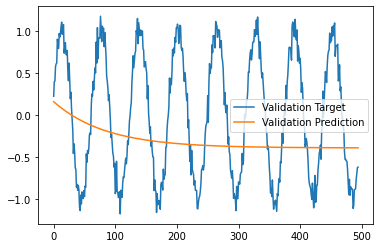

In [ ]:

plt.plot(validation_target,label='Validation Target')
plt.plot(validation_prediction,label='Validation Prediction')
plt.legend()

This is a bad fit as RNN is over-parameterized, AR model fits better.

# Understanding the Shapes in RNN

N - Number of Samples

T - Sequence Length

D - Number of Input Features

M - Number of Hidden Units

K - Number of Output Units

In [ ]:
#Make Some Data
N=1
T=10
D=3
M=5
K=2
X=np.random.randn(N,T,D)

In [ ]:
X.shape

(1, 10, 3)

In [ ]:
#Define Simple RNN
class SimpleRNN(nn.Module):
  def __init__(self,num_inputs,num_hidden,num_layers,num_outputs):
    super(SimpleRNN,self).__init__()
    self.D=num_inputs
    self.M=num_hidden
    self.K=num_outputs
    self.L=num_layers
    #note : batch_first=True means that data will be of shape (num_samples,sequence_length,num_features) rather than (sequence_lengthnum_samples,num_feaures)
    self.rnn=nn.RNN(
      input_size=self.D,
      hidden_size=self.M,
      num_layers=self.L,
      nonlinearity='tanh',
      batch_first=True)
    self.fc=nn.Linear(self.M,self.K)
  def forward(self,X):
    # Initial hidden states :  L x N x M
 
    h0=torch.zeros(self.L,X.size(0),self.M).to(device)
    #Get RNN unit output
    #out is of size (N , T , M)
    out,_=self.rnn(X,h0)
    #We only want hT at the final time-step
    #N x M -> N x K
    out=self.fc(out[:,-1,:])
    return out

In [ ]:
model=SimpleRNN(num_inputs=N,num_hidden=m,num_layers=L,num_outputs=K)
#Get the output
inputs=torch.from_numpy(X.astype(np.float32))
out=model(inputs)
#Detach output and save as numpy array
Yhats_torch=out.detach().numpy()
#Get Parameters of RNN model
w_xh,w_hh,b_xh,b_hh=model.rnn.parameters()


In [ ]:
w_xh=w_xh.data.numpy()
w_hh=w_hh.data.numpy()
b_xh=b_xh.data.numpy()
b_hh=b_hh.data.numpy()


In [ ]:
#Get fully connected layer parameters
wo,bo=model.fc.parameters()
wo=wo.data.numpy()
bo=bo.data.numpy()


# GRU & LSTM

<h2> Modern RNNs Unit </h2>

- GRU 

- LSTM

The reasons why RNN is not good enough is :

1. Vanishing Gradient : The output prediction in ANN is composite function , depending on x1,x2,x3,...xt. Suppose we want to take derivative of this function wrt Wxh, hence we will be finding derivative wrt Wxh for time t=1 to t=T for all X. Hence all of these single derivative are going to appear somewhere in our expression for the gradient of our cost wrt Wxh. Deeply nested each term is wrt y_hat(T) . The term involving x1 , i.e at the first time stamp is deeply nested. Hence y_hat(T) is the composite function which turn into multiplication in the gradients due to the chain rule . Hence, more deeply nested terms have to be multiplied maximum times. Hence RNN are vulnerable to vanishing gradient issue. Farther back in the sequence the input is , the more its gradient vanishes. Solution for this issue is to use GRU or LSTM.

<h3> GRU </h3>

There is a hidden unit at time t[h(t)], it depends on x(t)[the input] and h(t-1) [Previous hidden unit].  In GRU, we calculate : 

  - z(t) - it is called **update gate vector**

  - r(t) - it is called **reset gate vector**

  - h(t) - it is hidden state

z(t)=a(Wxz.T*x(t) + Whz.T*h(t-1)+bz)

r(t)=a(Wxr.T*x(t) + Whr.T*h(t-1)+br)

h(t)=(1-z(t)).h(t-1) + z(t).tanh(Wxh.T*x(t) + Whh.T*(r(t).h(t-1))+bh)

h(t),z(t),r(t) are of same size of size M, M is a hyper-parameter , i.e how many feature or hidden units. This also implies shape of weights, if any weights going from x(t) to one of the gate vectores then it must be of size DxM. If weight is going from h(t-1) , it should be of size MxM. 

z(t) tells us what should we do, should we take new value for the hidden state or should we just remember the previous hidden state h(t-1). Simple RNN tends to forget things which it has seen in the past. Using this gate , it allows you to remember the previous hidden state so that it can be carried forward to the next hidden state h(t+1). z(t) is the ouput of the sigmoid, its values are always between 0 & 1. Therefore for h(t) we always take weighted sum of the previous h(t-1) . If z(t) is close to 0 then we will remember the old value of h(t-1) but if z(t) is close to 1 , then we will forget the new value and forget the old h(t-1) .

We concatenate : 

1. v=[x(t),h(t-1)]

2. W(vz)=[W(xz),W(hz)]

3. z(t)=a(W(vz).T * v + bz)

z(t) tells us the probability of choosing h(t) or remembring old h(t-1). Hence we can express h(t) as 

h(t) = p(keep h(t-1)) * h(t-1) + p(discard h(t-1)) Simple RNN (x(t),h(t-1))

**Reset Gate**

Reset gate is used by doing element wise multiplication with h(t-1)). Value of r(t) are always between 0 and 1. If we multiply h(t-1) by close to zero value , it gets closer to zero, but if we multiply by 1 then h(t-1) remains same .

Hence reset gate decides which part to remember and which to forget.

<h3> LSTM </h3>

LSTM have more state vectors and gates. LSTM has two states :

  - h(t) Hidden State

  - c(t) Cell State

Initial States : X(T) , h(0), c(0) 

**LSTM Equation:**

![LSTM](https://raw.githubusercontent.com/RiseAboveAll/PYTORCH_Learning/master/LSTM-equation.PNG)

We have lot of gates like : 

f(t) - Forget Gate Vector 

i(t) - Input / Update Gate Vector

o(t) - Output Gate Vector

We have two states :

- Cell State c(t)

- Hidden State h(t)

Cell state takes the role of h(t) from GRU, we have weighted sum of two terms: previous cell state[c(t-1)], how much of it we end up keeping is controlled by **forget gate** f(t) , the second term is the simple RNN equation which is controlled by **input gate** i(t). In the equation f(c) & f(h) is activation function , by default it is tanh. **Hidden State** is simple transformation on cell state c(t) and multiply it by an output gate o(t) which controls which value of cell state we pass through to the hidden state h(t) . 





<h2> Code Comparison of Simple RNN , GRU, LSTM </h2>


<h3> Simple RNN </h3>

```
nn.RNN(
  input_size=self.D,
  hidden_size=self.M,
  num_layers=self.L,
  nonlinearity='relu',
  batch_first=True)

```

<h3> GRU </h3>

```

nn.GRU(
  input_size=self.D,
  hidden_size=self.M,
  num_layers=self.L,
  batch_first=True)

```
<h3> LSTM </h3>

```
nn.LSTM(
  input_size=self.D,
  hidden_size=self.M,
  num_layers=self.L,
  batch_first=True)

```

<h2> Forward Function </h2>

<h3>- GRU </h3>

```
  def forward(self,X):
    # Initial hidden states :  L x N x M
 
    h0=torch.zeros(self.L,X.size(0),self.M).to(device)
    #Get RNN unit output
    #out is of size (N , T , M)
    out,_=self.rnn(X,h0)
 

```

<h3>- LSTM </h3>

```
  def forward(self,X):
    # Initial hidden states :  L x N x M
 
    h0=torch.zeros(self.L,X.size(0),self.M).to(device)
    c0=torch.zeros(self.L,X.size(0),self.M).to(device)
    #Get RNN unit output
    #out is of size (N , T , M)
    out,_=self.rnn(X,(h0,c0))
 ```


#### Code

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Create Series

series=np.sin((.1*np.arange(400))**2)

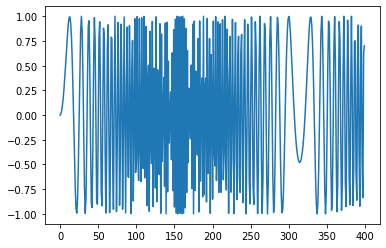

In [ ]:
# Plot it
plt.plot(series)
plt.show()

In [ ]:
# Build Dataset
T=10
D=1
X=[]
Y=[]
for t in range(len(series)-T):
  x=series[t:t+T]
  X.append(x)
  y=series[t+T]
  Y.append(y)
X=np.array(X).reshape(-1,T,1)#make it N x T
Y=np.array(Y).reshape(-1,1)
N=len(X)


In [ ]:
# Set Device
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
class LSTM(nn.Module):
  def __init__(self,n_inputs,n_hidden,n_layers,n_outputs):
    super(LSTM,self).__init__()
    self.D=n_inputs
    self.M=n_hidden
    self.K=n_outputs
    self.L=n_layers
    self.lstm=nn.LSTM(input_size=self.D,hidden_size=self.M,num_layers=self.L,batch_first=True)
    self.fc=nn.Linear(self.M,self.K)
  
  def forward(self,X):
    # Initial Hidden State
    h0=torch.zeros(self.L,X.size(0),self.M).to(device)
    c0=torch.zeros(self.L,X.size(0),self.M).to(device)
    out,_=self.lstm(X,(h0,c0))
    out=self.fc(out[:,-1,:])
    return out
    

In [ ]:
model=LSTM(n_inputs=1,n_hidden=10,n_layers=1,n_outputs=1)
model.to(device)

LSTM(
  (lstm): LSTM(1, 10, batch_first=True)
  (fc): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
criterion=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=.05)

In [ ]:
X_train=torch.from_numpy(X[:-N//2].astype(np.float32))
y_train=torch.from_numpy(Y[:-N//2].astype(np.float32))
X_test=torch.from_numpy(X[-N//2:].astype(np.float32))
y_test=torch.from_numpy(Y[-N//2:].astype(np.float32))


In [ ]:
def full_gd(model,criterion,optimizer,X_train,y_train,X_test,y_test,epochs=200):
  train_losses=np.zeros(epochs)
  test_losses=np.zeros(epochs)
  for it in range(epochs):
    #t0=datetime.now()
    
    optimizer.zero_grad()
    
    #Forward Pass
    outputs=model(X_train)
    loss=criterion(outputs,y_train)
    #Bacward Pass
    loss.backward()
    #Perform single optmization step
    optimizer.step()
    #Training Loss
    train_losses[it]=loss.item()
    #Test Loss
    test_output=model(X_test)
    test_loss=criterion(test_output,y_test)
    test_losses[it]=test_loss.item()
    
    print(f'Epoch {it+1}/{epochs} , Train Loss : {loss.item() : .4f},  Test Loss : {test_loss.item() : .4f}')
  return train_losses,test_losses


In [ ]:
X_train,y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)

In [ ]:
train_losses,test_losses=full_gd(model, criterion,optimizer,X_train,y_train,X_test,y_test)

Epoch 1/200 , Train Loss :  0.5549,  Test Loss :  0.5035
Epoch 2/200 , Train Loss :  0.5132,  Test Loss :  0.5301
Epoch 3/200 , Train Loss :  0.5249,  Test Loss :  0.5367
Epoch 4/200 , Train Loss :  0.5171,  Test Loss :  0.5385
Epoch 5/200 , Train Loss :  0.5050,  Test Loss :  0.5513
Epoch 6/200 , Train Loss :  0.5017,  Test Loss :  0.5733
Epoch 7/200 , Train Loss :  0.5038,  Test Loss :  0.5922
Epoch 8/200 , Train Loss :  0.5017,  Test Loss :  0.6075
Epoch 9/200 , Train Loss :  0.4972,  Test Loss :  0.6205
Epoch 10/200 , Train Loss :  0.4940,  Test Loss :  0.6299
Epoch 11/200 , Train Loss :  0.4926,  Test Loss :  0.6321
Epoch 12/200 , Train Loss :  0.4908,  Test Loss :  0.6252
Epoch 13/200 , Train Loss :  0.4865,  Test Loss :  0.6107
Epoch 14/200 , Train Loss :  0.4796,  Test Loss :  0.5926
Epoch 15/200 , Train Loss :  0.4716,  Test Loss :  0.5761
Epoch 16/200 , Train Loss :  0.4641,  Test Loss :  0.5653
Epoch 17/200 , Train Loss :  0.4531,  Test Loss :  0.5610
Epoch 18/200 , Train Lo

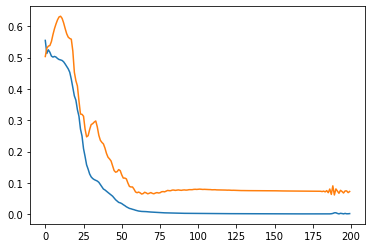

In [ ]:
plt.plot(train_losses,label="train losses")
plt.plot(test_losses,label="test losses")